### 💻 세미 프로젝트
- 아몬드 씨앗 이미지의 패턴을 분석하고 분류하는 모델 학습 프로젝트

#### 📑 데이터 세트
- 튀르키예에서 재배된 4가지 품종의 아몬드 씨앗 이미지들

#### 🥜 예시
> - Ak
> 
> <img src='./datasets/almonds/original/ak/ak1.png' width='200px' style='margin-top: 10px;'>

> - Kapadokya
>
> <img src='./datasets/almonds/original/kapadokya/kapadokya1.png' width='200px' style='margin-top: 10px;'>

> - Nurlu
>
> <img src='./datasets/almonds/original/nurlu/nurlu1.png' width='200px' style='margin-top: 10px;'>

> - Sıra
>
> <img src='./datasets/almonds/original/sira/sira1.png' width='200px' style='margin-top: 10px;'>

### 🖼️ 이미지 파일이름 변경
- 폴더명은 소문자로 변경
- 각 폴더 안 이미지들은 '폴더명.png01' 형식으로 이름과 확장자 변경

In [6]:
from glob import glob
import os

root = './datasets/almonds/original/'

# 위 경로에 있는 directory(폴더)들을 list 형태로 저장
directories = glob(os.path.join(root,'*'))

# 변경 후의 폴더명이 담긴 리스트
dir_names = ['ak', 'kapadokya', 'nurlu', 'sira']

# 위 이름으로 폴더명 변경
for name, directory in zip(dir_names, directories):
    os.rename(directory, os.path.join(root, name))

In [9]:
root = './datasets/almonds/original/'

directories = glob(os.path.join(root,'*'))
dir_names = []

# root 경로 안 directory들의 이름 출력 (제대로 변환되었는지 확인)
for directory in directories:
    dir_names.append(directory[directory.rindex('\\') + 1:])

print(dir_names)

['ak', 'kapadokya', 'nurlu', 'sira']


In [10]:
# 각 폴더 안 이미지 파일의 이름을 '폴더명+숫자(01, 02, ...).png'로 변경
for name in dir_names:
    for i, file_name in enumerate(os.listdir(os.path.join(root, name))):
        # 기존 파일명
        old_file = os.path.join(root + name + '/', file_name)

        # 변경 후 파일명
        new_file = os.path.join(root + name + '/', name + str(i + 1) + '.png')

        os.rename(old_file, new_file)

### 🖼️ 이미지 데이터 분할
- original 폴더에 있던 이미지들을 복사해서 train, validation, test로 분할

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator 선언 - RGB 값을 0 ~ 1사이로 스케일링만
image_data_generator = ImageDataGenerator(rescale=1./255)

# 이미지의 가로, 세로 길이를 상수로 선언
IMAGE_SIZE = 244

generator = image_data_generator.flow_from_directory(root,
                                                     target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                     batch_size=32,
                                                     class_mode='categorical')

print(generator.class_indices)

Found 1556 images belonging to 4 classes.
{'ak': 0, 'kapadokya': 1, 'nurlu': 2, 'sira': 3}


In [12]:
import pandas as pd

# 경로 및 target 클래스로 데이터프레임 생성
a_df = pd.DataFrame({'file_paths': generator.filepaths, 'targets': generator.classes})
a_df

,file_paths,targets
0,./datasets/almonds/original/ak\ak1.png,0
1,./datasets/almonds/original/ak\ak10.png,0
2,./datasets/almonds/original/ak\ak100.png,0
3,./datasets/almonds/original/ak\ak101.png,0
4,./datasets/almonds/original/ak\ak102.png,0
...,...,...
1551,./datasets/almonds/original/sira\sira95.png,3
1552,./datasets/almonds/original/sira\sira96.png,3
1553,./datasets/almonds/original/sira\sira97.png,3
1554,./datasets/almonds/original/sira\sira98.png,3


In [13]:
# file_path의 '\\'를 '/'로 변경
a_df.loc[:, 'file_paths'] = a_df.file_paths.apply(lambda x: x.replace('\\', '/'))
a_df

,file_paths,targets
0,./datasets/almonds/original/ak/ak1.png,0
1,./datasets/almonds/original/ak/ak10.png,0
2,./datasets/almonds/original/ak/ak100.png,0
3,./datasets/almonds/original/ak/ak101.png,0
4,./datasets/almonds/original/ak/ak102.png,0
...,...,...
1551,./datasets/almonds/original/sira/sira95.png,3
1552,./datasets/almonds/original/sira/sira96.png,3
1553,./datasets/almonds/original/sira/sira97.png,3
1554,./datasets/almonds/original/sira/sira98.png,3


In [14]:
from sklearn.model_selection import train_test_split

# train, test 데이터 세트 분할
X_train, X_test, y_train, y_test = \
            train_test_split(a_df.file_paths, a_df.targets, stratify=a_df.targets, test_size=0.2, random_state=124)

# train, test의 target 분포 출력
print(y_train.value_counts())
print(y_test.value_counts())

targets
1    372
0    320
3    307
2    245
Name: count, dtype: int64
targets
1    93
0    81
3    77
2    61
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split

# validation 데이터 세트 분할
X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

# train, validation의 target 분포 출력
print(y_train.value_counts())
print(y_val.value_counts())

targets
1    297
0    256
3    246
2    196
Name: count, dtype: int64
targets
1    75
0    64
3    61
2    49
Name: count, dtype: int64


In [16]:
import shutil

root = './datasets/almonds/'

# train 이미지를 'train' 폴더에 복사
for file_path in X_train:
    almond_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'train/' + almond_dir)

    # train 폴더가 없으면 생성
    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [17]:
root = './datasets/almonds/'

# validation과 test도 똑같이 생성
for file_path in X_val:
    almond_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'validation/' + almond_dir)

    # train 폴더가 없으면 생성
    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [18]:
root = './datasets/almonds/'

for file_path in X_test:
    almond_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'test/' + almond_dir)

    # train 폴더가 없으면 생성
    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

### 🎈 Augmentation 및 ImageDataGenerator 생성
- 모델 훈련에 사용할 이미지 데이터의 양을 늘려주는 작업
- train 이미지에만 Augmentation 실행
- validation과 test 데이터는 RGB 값 스케일링만 실행

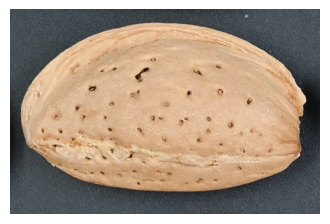

In [22]:
import cv2
import matplotlib.pyplot as plt

# 모델 학습 전, 이미지들 중 하나 골라서 시각화
image = cv2.cvtColor(cv2.imread(generator.filepaths[500]), cv2.COLOR_BGR2RGB)

# 이미지 시각화 함수
def show_image(image):
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.axis('off')

# 이미지 시각화
show_image(image)

In [35]:
import albumentations as A
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 Augmentation 함수
# Compose의 확률을 1로 지정하지 않는 이유는 원본 데이터도 fit하기 위함
def aug_transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.ShiftScaleRotate(shift_limit=0, scale_limit=(0.5, 1.5), rotate_limit=90, border_mode=cv2.BORDER_CONSTANT, p=0.5),
        A.RandomResizedCrop(width=244, height=244, scale=(0.1, 0.5), p=1),
        A.Blur(blur_limit=(2, 5), p=0.5),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
        ], p=1)
    ], p=0.8)

    return aug(image=image)['image']

# 위 함수를 ImageDataGenerator를 불러올 때 같이 실행
idg = ImageDataGenerator(preprocessing_function=aug_transform, rescale=1./255)

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = './datasets/almonds/train/'
val_dir = './datasets/almonds/validation/'
test_dir = './datasets/almonds/test/'

# train 데이터에는 Augmentation 적용
train_generator = idg.flow_from_directory(
    train_dir,
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical'
)

# validation과 test 데이터는 RGB 값 스케일링만 실행
non_aug_idg = ImageDataGenerator(rescale=1./255)

val_generator = non_aug_idg.flow_from_directory(
    val_dir,
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical'
)

test_generator = non_aug_idg.flow_from_directory(
    test_dir,
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical'
)

# 각각의 클래스 분류 출력
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

Found 995 images belonging to 4 classes.
Found 249 images belonging to 4 classes.
Found 312 images belonging to 4 classes.
{'ak': 0, 'kapadokya': 1, 'nurlu': 2, 'sira': 3}
{'ak': 0, 'kapadokya': 1, 'nurlu': 2, 'sira': 3}
{'ak': 0, 'kapadokya': 1, 'nurlu': 2, 'sira': 3}


### 🤖 모델 생성
- Layer를 쌓아 딥러닝 모델 생성
- 첫 사이클에서는 Layer는 적게, batch_size는 크게(32), 규제는 Hidden Layer의 Dense에만 걸고 진행

In [63]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l1, l2

# 이미지 사이즈 조정
IMAGE_SIZE = 244

# 컬러 이미지를 학습시키기 때문에 채널 수는 3으로 설정
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Convolution Backbone
x = Conv2D(filters=32, kernel_size=5, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=5, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=5, strides=2, padding='valid', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Classifier
x = Flatten()(x)
x = Dropout(rate=0.5)(x)

x = Dense(100, activation='relu', kernel_initializer='he_normal')(x)
x = Dropout(rate=0.5)(x)

output = Dense(4, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_88 (Conv2D)                   │ (None, 244, 244, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_88               │ (None, 244, 244, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_88 (Activation)           │ (None, 244, 244, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_89 (Conv2D)                   │ (None, 244, 244, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_89               │ (None, 244, 244, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_89 (Activation)           │ (None, 244, 244, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_90 (Conv2D)                   │ (None, 120, 120, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_90               │ (None, 120, 120, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_90 (Activation)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_91 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_91               │ (None, 60, 60, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_91 (Activation)           │ (None, 60, 60, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 230400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 230400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 100)                 │      23,040,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 4)                   │             404 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,157,528 (88.34 MB)

 Trainable params: 23,157,144 (88.34 MB)

 Non-trainable params: 384 (1.50 KB)

In [64]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# 모델 컴파일링
# 원핫 인코딩은 generator 생성하면서 진행했으므로, Loss Function으로 CategoricalCrossentropy 사용
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [65]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback (ModelCheckpoint) 선언
# val_loss의 최소값이 갱신될 때마다 가중치 파일 생성
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/cycle1/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

# callback (ReduceLROnPlateau) 선언
# epoch 3회 동안 val_loss의 최소값이 갱신되지 않으면, 다음 epoch의 learning rate가 1/10로 감소
rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    mode='min'
)

# callback (EarlyStopping) 선언
# epoch 5회 동안 val_loss의 최소값이 갱신되지 않으면 학습 조기 종료
ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

In [66]:
history = model.fit(train_generator, 
                    batch_size=32, 
                    epochs=20, 
                    validation_data=(val_generator), 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - acc: 0.2547 - loss: 24.9361 - val_acc: 0.2651 - val_loss: 3.5669 - learning_rate: 0.0010
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step - acc: 0.2587 - loss: 1.3860 - val_acc: 0.3012 - val_loss: 1.3850 - learning_rate: 0.0010
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 130s 4s/step - acc: 0.2987 - loss: 1.3845 - val_acc: 0.3012 - val_loss: 1.3839 - learning_rate: 0.0010
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 133s 4s/step - acc: 0.3036 - loss: 1.3838 - val_acc: 0.3012 - val_loss: 1.3831 - learning_rate: 0.0010
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - acc: 0.2884 - loss: 1.3844 - val_acc: 0.3012 - val_loss: 1.3822 - learning_rate: 0.0010
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - acc: 0.3118 - loss: 1.3814 - val_acc: 0.3012 - val_loss: 1.3814 - learning_rate: 0.0010
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - acc: 0.2929 - loss: 1.3821 - val_acc: 0.3012 - val_loss: 1.3808 - learning_rate: 0.0010
Epoch 8/20
3

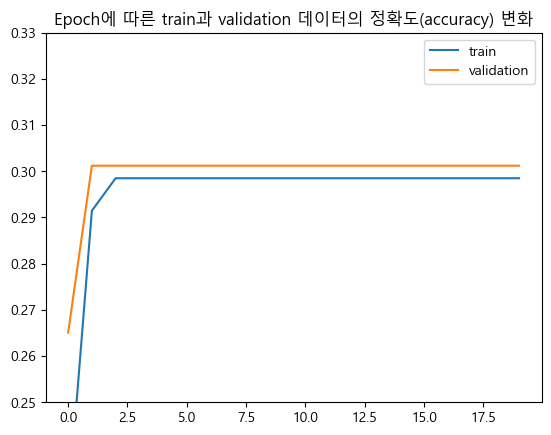

In [70]:
import matplotlib.pyplot as plt

# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 각 epoch 별 train과 validation 데이터의 정확도 변화를 시각화
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.ylim(0.25, 0.33)
plt.legend()
plt.title('Epoch에 따른 train과 validation 데이터의 정확도(accuracy) 변화')
plt.show()

In [71]:
# 모델 성능 평가
model.evaluate(test_generator, batch_size=32)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 736ms/step - acc: 0.2966 - loss: 1.3775


[1.3765079975128174, 0.29807692766189575]

#### 🚩 1st Cycle - 학습 결과
- 2번째 epoch 이후로 validation 데이터의 정확도와 loss의 변화가 거의 없었다.
- 전반적으로 정확도가 낮게 측정되었고, 각 클래스 이미지 별 패턴 차이를 더욱 꼼꼼하게 잡아낼 필요가 있다고 생각했기 때문에   
  다음 사이클에서는 모델의 층을 늘려, 미세한 패턴도 잡아낼 수 있게 조정한다.

### 2nd Cycle
- Convolution Backbone 층을 늘려서 패턴을 더욱 세밀하게 학습하는 모델을 만든다.

In [84]:
import albumentations as A
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 Augmentation 함수
# Compose의 확률을 1로 지정하지 않는 이유는 원본 데이터도 fit하기 위함
def aug_transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomResizedCrop(width=244, height=244, scale=(0.2, 0.5), p=1),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
        ], p=1)
    ], p=0.5)

    return aug(image=image)['image']

# 위 함수를 ImageDataGenerator를 불러올 때 같이 실행
idg = ImageDataGenerator(preprocessing_function=aug_transform, rescale=1./255)

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = './datasets/almonds/train/'
val_dir = './datasets/almonds/validation/'
test_dir = './datasets/almonds/test/'

# train 데이터에는 Augmentation 적용
train_generator = idg.flow_from_directory(
    train_dir,
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical'
)

# validation과 test 데이터는 RGB 값 스케일링만 실행
non_aug_idg = ImageDataGenerator(rescale=1./255)

val_generator = non_aug_idg.flow_from_directory(
    val_dir,
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical'
)

test_generator = non_aug_idg.flow_from_directory(
    test_dir,
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical'
)

# 각각의 클래스 분류 출력
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

Found 995 images belonging to 4 classes.
Found 249 images belonging to 4 classes.
Found 312 images belonging to 4 classes.
{'ak': 0, 'kapadokya': 1, 'nurlu': 2, 'sira': 3}
{'ak': 0, 'kapadokya': 1, 'nurlu': 2, 'sira': 3}
{'ak': 0, 'kapadokya': 1, 'nurlu': 2, 'sira': 3}


In [124]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l1, l2

# 이미지 사이즈 조정
IMAGE_SIZE = 244

# 컬러 이미지를 학습시키기 때문에 채널 수는 3으로 설정
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Convolution Backbone
# 이미지 크기를 줄이는 과정에서는 filter를 32로 고정 - 파라미터 수를 최소화하기 위함
x = Conv2D(filters=32, kernel_size=5, padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=5, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=5, strides=2, padding='valid', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=5, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# 이미지 크기가 충분히 작아졌다면 filter 수 증강 - 자극을 줌으로써 분류 성능을 높이기 위함
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=16, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=16, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


# Classifier
x = GlobalAveragePooling2D()(x)
# x = Dropout(rate=0.5)(x)

x = Dense(100, activation='relu', kernel_initializer='he_normal')(x)
# x = Dropout(rate=0.5)(x)

output = Dense(4, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_115"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_58 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_626 (Conv2D)                  │ (None, 244, 244, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_626              │ (None, 244, 244, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_626 (Activation)          │ (None, 244, 244, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_627 (Conv2D)                  │ (None, 244, 244, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_627              │ (None, 244, 244, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_627 (Activation)          │ (None, 244, 244, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_628 (Conv2D)                  │ (None, 120, 120, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_628              │ (None, 120, 120, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_628 (Activation)          │ (None, 120, 120, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_629 (Conv2D)                  │ (None, 60, 60, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_629              │ (None, 60, 60, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_629 (Activation)          │ (None, 60, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_630 (Conv2D)                  │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_630              │ (None, 60, 60, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_630 (Activation)          │ (None, 60, 60, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_631 (Conv2D)                  │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_631              │ (None, 60, 60, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 506,616 (1.93 MB)

 Trainable params: 505,144 (1.93 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [125]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# 모델 컴파일링
# 원핫 인코딩은 generator 생성하면서 진행했으므로, Loss Function으로 CategoricalCrossentropy 사용
model.compile(optimizer=Adam(1e-4), loss=CategoricalCrossentropy(), metrics=['acc'])

In [126]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback (ModelCheckpoint) 선언
# val_loss의 최소값이 갱신될 때마다 가중치 파일 생성
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/cycle2/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

# callback (ReduceLROnPlateau) 선언
# epoch 2회 동안 val_loss의 최소값이 갱신되지 않으면, 다음 epoch의 learning rate가 1/10로 감소
rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

# callback (EarlyStopping) 선언
# epoch 3회 동안 val_loss의 최소값이 갱신되지 않으면 학습 조기 종료
ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [127]:
history = model.fit(train_generator, 
                    batch_size=32, 
                    epochs=20, 
                    validation_data=(val_generator), 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 187s 5s/step - acc: 0.3242 - loss: 1.3590 - val_acc: 0.2450 - val_loss: 1.3865 - learning_rate: 1.0000e-04
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 186s 6s/step - acc: 0.4255 - loss: 1.2006 - val_acc: 0.1767 - val_loss: 1.4166 - learning_rate: 1.0000e-04
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 177s 6s/step - acc: 0.5145 - loss: 1.0768 - val_acc: 0.1647 - val_loss: 1.4414 - learning_rate: 1.0000e-04
Epoch 4/20
17/32 ━━━━━━━━━━━━━━━━━━━━ 1:23 6s/step - acc: 0.5500 - loss: 1.0509

KeyboardInterrupt: 

#### 🚩 2nd Cycle - 학습 결과
- 이전 사이클의 모델에 비해 성능이 매우 크게 감소했으며, 과적합 현상도 확인되었다.
- 또한, Convolution Backbone 층 수가 늘어남에 따라 epoch 당 학습 시간 역시 증가했기 때문에,  
  Early Stopping이 발생하기 전에 학습을 종료했다.

### 3rd Cycle
- 모든 이미지가 가운데에 배치되어 있었으며, 크기도 컸기 때문에,  
  이전 사이클보다 분류기에 전달되는 시점에서의 이미지 크기를 줄여보기로 한다.
- 또한, 더욱 세밀한 분류를 위해 분류기의 Dense Layer 층을 늘려서 DNN 형태로 만들어보기로 한다.

In [144]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Activation, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l1, l2

# 이미지 사이즈 조정
IMAGE_SIZE = 244

# 컬러 이미지를 학습시키기 때문에 채널 수는 3으로 설정
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Convolution Backbone
# 이미지 크기를 줄이는 과정에서는 filter를 32로 고정 - 파라미터 수를 최소화하기 위함
x = Conv2D(filters=32, kernel_size=5, strides=2, padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=5, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2, 1)(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2, 2)(x)

# Classifier
x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu', kernel_initializer='he_normal')(x)
x = Dense(100, activation='relu', kernel_initializer='he_normal')(x)

output = Dense(4, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_123"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_62 (InputLayer)          │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_656 (Conv2D)                  │ (None, 122, 122, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_656              │ (None, 122, 122, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_656 (Activation)          │ (None, 122, 122, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_657 (Conv2D)                  │ (None, 122, 122, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_657              │ (None, 122, 122, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_657 (Activation)          │ (None, 122, 122, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 121, 121, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_658 (Conv2D)                  │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_658              │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_658 (Activation)          │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_659 (Conv2D)                  │ (None, 31, 31, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_659              │ (None, 31, 31, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_659 (Activation)          │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_32 (Flatten)                 │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_91 (Dropout)                 │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 200)                 │       2,880,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,984,960 (11.39 MB)

 Trainable params: 2,984,576 (11.39 MB)

 Non-trainable params: 384 (1.50 KB)

In [145]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# 모델 컴파일링
# 원핫 인코딩은 generator 생성하면서 진행했으므로, Loss Function으로 CategoricalCrossentropy 사용
model.compile(optimizer=Adam(1e-6), loss=CategoricalCrossentropy(), metrics=['acc'])

In [146]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback (ModelCheckpoint) 선언
# val_loss의 최소값이 갱신될 때마다 가중치 파일 생성
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/cycle2/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

# callback (ReduceLROnPlateau) 선언
# epoch 2회 동안 val_loss의 최소값이 갱신되지 않으면, 다음 epoch의 learning rate가 1/10로 감소
rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

# callback (EarlyStopping) 선언
# epoch 3회 동안 val_loss의 최소값이 갱신되지 않으면 학습 조기 종료
ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)

In [147]:
history = model.fit(train_generator, 
                    batch_size=32, 
                    epochs=20, 
                    validation_data=(val_generator), 
                    callbacks=[mcp_cb, rlr_cb, ely_cb], shuffle=True)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 869ms/step - acc: 0.2510 - loss: 1.8518 - val_acc: 0.2691 - val_loss: 1.3696 - learning_rate: 1.0000e-06
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 912ms/step - acc: 0.2459 - loss: 1.7957 - val_acc: 0.3092 - val_loss: 1.3643 - learning_rate: 1.0000e-06
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 890ms/step - acc: 0.2748 - loss: 1.5910 - val_acc: 0.3655 - val_loss: 1.3594 - learning_rate: 1.0000e-06
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 921ms/step - acc: 0.3093 - loss: 1.6548 - val_acc: 0.3855 - val_loss: 1.3534 - learning_rate: 1.0000e-06
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 941ms/step - acc: 0.3136 - loss: 1.5282 - val_acc: 0.3976 - val_loss: 1.3431 - learning_rate: 1.0000e-06
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 936ms/step - acc: 0.2957 - loss: 1.5257 - val_acc: 0.4177 - val_loss: 1.3286 - learning_rate: 1.0000e-06
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 968ms/step - acc: 0.2788 - loss: 1.6093 - val_acc: 0.4498 - val_loss: 1.3142

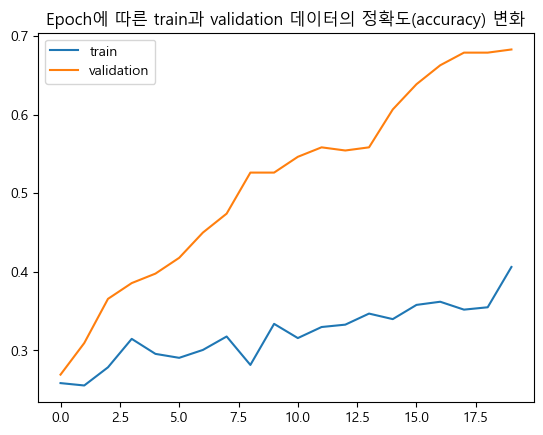

In [148]:
import matplotlib.pyplot as plt

# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 각 epoch 별 train과 validation 데이터의 정확도 변화를 시각화
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.title('Epoch에 따른 train과 validation 데이터의 정확도(accuracy) 변화')
plt.show()

In [149]:
# 모델 성능 평가
model.evaluate(test_generator, batch_size=32)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - acc: 0.6110 - loss: 0.9879


[0.9475498795509338, 0.6378205418586731]

#### 🚩 3rd Cycle - 학습 결과
- 이전 사이클에 비해 학습 시간이 크게 감소했고, validation 데이터에 대한 예측 정확도가 크게 향상되었다.
- 이전 사이클에 비해 모델의 구조가 단순화됨에 따라, 층을 쌓는 것만이  
  모델의 성능을 향상시키는 방법은 아니라는 사실을 습득했다.